### Prueba de Selección de la empresa Azzorti para el puesto Prácticante de Ciencia de Datos

Cierta compañía internacional de venta directa tiene un catálogo que tiene
21 días de vida, los primeros tres días se reciben alrededor del 30% (en
promedio) de los pedidos totales que corresponden a los 10 grupos de venta.
Con dichos pedidos se busca pronosticar los pedidos totales al cierre de los
21 días.

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklear.metrics import mean_squared_error

In [242]:
%%time
datos = pd.read_excel("datos/Datos_201901_202009.xlsx", index_col=None, engine="openpyxl") # Retorna un DataFrame
#datos.head(5) # Primeras 5 campañas del 2019
#datos.columns # Listar las columnas
datos.info() # Lista de metadatos del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CAMPAÑA          27 non-null     int64
 1   GRUPO_1          27 non-null     int64
 2   GRUPO_2          27 non-null     int64
 3   GRUPO_3          27 non-null     int64
 4   GRUPO_4          27 non-null     int64
 5   GRUPO_5          27 non-null     int64
 6   GRUPO_6          27 non-null     int64
 7   GRUPO_7          27 non-null     int64
 8   GRUPO_8          27 non-null     int64
 9   GRUPO_9          27 non-null     int64
 10  GRUPO_10         27 non-null     int64
 11  PEDIDOS_TOTALES  27 non-null     int64
dtypes: int64(12)
memory usage: 2.7 KB
CPU times: user 29.6 ms, sys: 54 µs, total: 29.7 ms
Wall time: 39.2 ms


In [219]:
datos["PEDIDOS_TOTALES"].describe()

count       27.000000
mean     55574.814815
std       6201.122641
min      43091.000000
25%      50666.000000
50%      56072.000000
75%      59168.500000
max      66863.000000
Name: PEDIDOS_TOTALES, dtype: float64

In [220]:
datos[ datos.CAMPAÑA < 202000 ].head(5)# Primeras 5 campañas del 2020

,CAMPAÑA,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES
0,201901,6492,6062,2961,1652,1190,89,31,410,15,43,54113
1,201902,4757,3618,2089,855,399,54,13,19,9,20,43091
2,201903,5047,3031,1018,309,157,63,12,7,8,10,50112
3,201904,6227,4586,2056,569,197,94,23,10,7,11,49522
4,201905,5738,4504,2710,525,114,54,21,8,10,7,51854


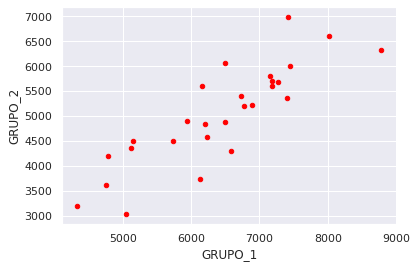

In [225]:
datos.plot(kind='scatter',x='GRUPO_1',y='GRUPO_2',color='red')
plt.show()

In [243]:
%%time
suma_grupos = datos['GRUPO_1'] + datos['GRUPO_2'] + datos['GRUPO_3'] + datos['GRUPO_4'] + datos['GRUPO_5'] + datos['GRUPO_6'] + datos['GRUPO_7'] + datos['GRUPO_8'] + datos['GRUPO_9'] + datos['GRUPO_10']
datos['PROMEDIO_GRUPOS_LOG'] = np.log( suma_grupos / 10 )
datos['AÑO_CAMPAÑA'] = datos['CAMPAÑA'] // 100
datos['TERCIO_AÑO_CAMPAÑA'] = (datos['CAMPAÑA'] % 100) // 3 # Falta optimizar esta característica

datos['GRUPO_1_LOG'] = np.log(datos['GRUPO_1'])
datos['GRUPO_2_LOG'] = np.log(datos['GRUPO_2'])
datos['GRUPO_3_LOG'] = np.log(datos['GRUPO_3'])
datos['GRUPO_4_LOG'] = np.log(datos['GRUPO_4'])
datos['GRUPO_5_LOG'] = np.log(datos['GRUPO_5'])
datos['GRUPO_6_LOG'] = np.log(datos['GRUPO_6'])
datos['GRUPO_7_LOG'] = np.log(datos['GRUPO_7'])
datos['GRUPO_8_LOG'] = np.log(datos['GRUPO_8'])
datos['GRUPO_9_LOG'] = np.log(datos['GRUPO_9'])
datos['GRUPO_10_LOG'] = np.log(datos['GRUPO_10'])
#datos['PEDIDOS_TOTALES_LOG'] = np.log(datos['PEDIDOS_TOTALES'])

datos['CAMBIO_PORCENTUAL_GRUPO_1'] = (datos['GRUPO_1'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_2'] = (datos['GRUPO_2'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_3'] = (datos['GRUPO_3'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_4'] = (datos['GRUPO_4'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_5'] = (datos['GRUPO_5'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_6'] = (datos['GRUPO_6'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_7'] = (datos['GRUPO_7'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_8'] = (datos['GRUPO_8'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_9'] = (datos['GRUPO_9'].pct_change()).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_10'] = (datos['GRUPO_10'].pct_change()).fillna(0)

datos = datos.drop(columns=['GRUPO_1', 'GRUPO_2', 'GRUPO_3', 'GRUPO_4', 'GRUPO_5', 'GRUPO_6',
                            'GRUPO_7', 'GRUPO_8', 'GRUPO_9', 'GRUPO_10', 'CAMPAÑA'])
datos.head(5)

CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 24.3 ms


,PEDIDOS_TOTALES,PROMEDIO_GRUPOS_LOG,AÑO_CAMPAÑA,TERCIO_AÑO_CAMPAÑA,GRUPO_1_LOG,GRUPO_2_LOG,GRUPO_3_LOG,GRUPO_4_LOG,GRUPO_5_LOG,GRUPO_6_LOG,...,CAMBIO_PORCENTUAL_GRUPO_1,CAMBIO_PORCENTUAL_GRUPO_2,CAMBIO_PORCENTUAL_GRUPO_3,CAMBIO_PORCENTUAL_GRUPO_4,CAMBIO_PORCENTUAL_GRUPO_5,CAMBIO_PORCENTUAL_GRUPO_6,CAMBIO_PORCENTUAL_GRUPO_7,CAMBIO_PORCENTUAL_GRUPO_8,CAMBIO_PORCENTUAL_GRUPO_9,CAMBIO_PORCENTUAL_GRUPO_10
0,54113,7.546710,2019,0,8.778326,8.709795,7.993282,7.409742,7.081709,4.488636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,43091,7.076062,2019,0,8.467372,8.193677,7.644441,6.751101,5.988961,3.988984,...,-0.267252,-0.403167,-0.294495,-0.482446,-0.664706,-0.393258,-0.580645,-0.953659,-0.400000,-0.534884
2,50112,6.873371,2019,1,8.526549,8.016648,6.925595,5.733341,5.056246,4.143135,...,0.060963,-0.162244,-0.512685,-0.638596,-0.606516,0.166667,-0.076923,-0.631579,-0.111111,-0.500000
3,49522,7.228388,2019,1,8.736650,8.430763,7.628518,6.343880,5.283204,4.543295,...,0.233802,0.513032,1.019646,0.841424,0.254777,0.492063,0.916667,0.428571,-0.125000,0.100000
4,51854,7.221909,2019,1,8.654866,8.412721,7.904704,6.263398,4.736198,3.988984,...,-0.078529,-0.017881,0.318093,-0.077329,-0.421320,-0.425532,-0.086957,-0.200000,0.428571,-0.363636


In [ ]:
#datos = datos.drop(columns=['GRUPO_1', 'GRUPO_2', 'GRUPO_3', 'GRUPO_4', 'GRUPO_5', 'GRUPO_6',
#                              'GRUPO_7', 'GRUPO_8', 'GRUPO_9', 'GRUPO_10'])
#datos
#datos.head(5)
datos
#datos.plot(kind='bar',x='CAMPAÑA', y='CAMBIO_PORCENTUAL_GRUPO_1',color='red')
#datos["AÑO_CAMPAÑA"].value_counts().plot(kind="bar", figsize=(5, 4))
#plt.title("Cambios porcentuales entre campañas")
#plt.show()

<AxesSubplot:xlabel='SUMA_GRUPOS', ylabel='PEDIDOS_TOTALES'>

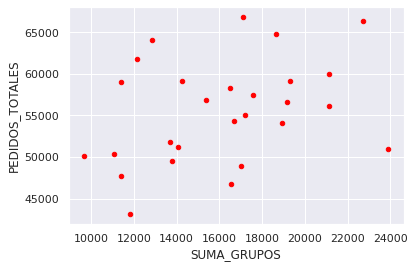

In [97]:
datos.plot(kind='scatter',x='SUMA_GRUPOS',y='PEDIDOS_TOTALES',color='red')

### Modelos de predicción

Se va modelar el problema usando 
    Linear Regresion
    -
    -
    -
   
La variables predictoras se analizaran de acuerdo al proceso de Ingeniería de Característica realizado previamente.

In [244]:
datos.head(2)

,PEDIDOS_TOTALES,PROMEDIO_GRUPOS_LOG,AÑO_CAMPAÑA,TERCIO_AÑO_CAMPAÑA,GRUPO_1_LOG,GRUPO_2_LOG,GRUPO_3_LOG,GRUPO_4_LOG,GRUPO_5_LOG,GRUPO_6_LOG,...,CAMBIO_PORCENTUAL_GRUPO_1,CAMBIO_PORCENTUAL_GRUPO_2,CAMBIO_PORCENTUAL_GRUPO_3,CAMBIO_PORCENTUAL_GRUPO_4,CAMBIO_PORCENTUAL_GRUPO_5,CAMBIO_PORCENTUAL_GRUPO_6,CAMBIO_PORCENTUAL_GRUPO_7,CAMBIO_PORCENTUAL_GRUPO_8,CAMBIO_PORCENTUAL_GRUPO_9,CAMBIO_PORCENTUAL_GRUPO_10
0,54113,7.546710,2019,0,8.778326,8.709795,7.993282,7.409742,7.081709,4.488636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,43091,7.076062,2019,0,8.467372,8.193677,7.644441,6.751101,5.988961,3.988984,...,-0.267252,-0.403167,-0.294495,-0.482446,-0.664706,-0.393258,-0.580645,-0.953659,-0.4,-0.534884


In [259]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
                                        datos.drop(columns=['PEDIDOS_TOTALES']),
                                        datos['PEDIDOS_TOTALES'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

y_prueba

18    48886
7     56826
4     51854
3     49522
25    59159
2     50112
Name: PEDIDOS_TOTALES, dtype: int64

In [261]:
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)
modelo

LinearRegression()

In [262]:
pedidos_totales_predecidos = modelo.predict(X_prueba)
pedidos_totales_predecidos

array([45179.92906735, 58754.23949375, 52333.96442346, 56566.23605871,
       41516.61706902, 57986.77306918])